## Practical Work 4

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods with adaptive learning rate <b>(Adagrad, RMSProp, and Adam)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
np.random.seed(5)
a ,b = -1, 2
X = np.random.uniform(0,20,100).reshape(-1,1)
Y = -2 * X + b
X = np.append(np.ones((X.shape[0],1)),X,axis = 1)
X.shape

(100, 2)

#### Plot your data points. 

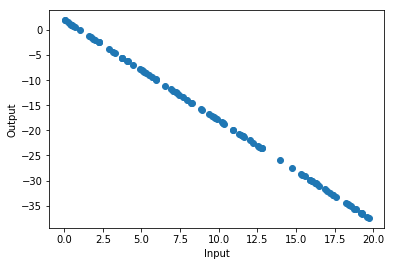

In [3]:
plt.scatter(X[:,1],Y)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Adagrad

### For a single variable linear regression ML model, build a function to find the optimum Theta_0 and Theta_1 parameters using Adagrad optimization algorithm.
#### The funtion should have the following input parameters:
##### 1. Input data as a matrix (or vector based on your data).
##### 2. Target label as a vector.
##### 3. Learning rate.
##### 4. Epsilon.
##### 5. Maximum number of iterations (Epochs).
#### The funtion should return the following outputs:
##### 1. All predicted Theta_0 in all iterations.
##### 2. All predicted Theta_1 in all iterations.
##### 3. Corresponding loss for each Theta_0 and Theta_1 predictions.
##### 4.All hypothesis outputs (prdicted labels) for each Theta_0 and Theta_1 predictions.
##### 5.Final Optimum values of Theta_0 and Theta_1.
#### Choose the suitable number of iterations, learning rate, Epsilon, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph), best fit line)
#### Try different values of the huperparameters and see the differnce in your results.

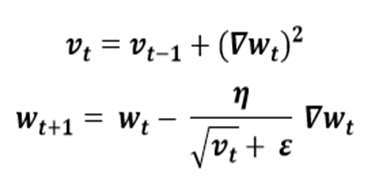

In [4]:
def adagard(x,y,alpha,epsilon,tolerance,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    vn = 0
    XT = x.T
    for i in range(max_iter):
        theta_copy = theta.copy()
        hx = np.dot(x,theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
        print("Iteration %d | The Cost is %f" %(i,j))
        gradients = (np.dot(XT,errors))/m
        vn = vn + np.power(gradients,2)
        theta = theta - ((gradients*alpha)/(np.sqrt(vn)+epsilon))
        if (theta == theta_copy).all() or j < tolerance:
            print("Stopped at Iteration %d | The Cost is %f" %(i,j))
            return theta,np.array(thetas),cost,iteration,np.array(hxs),alpha
    return theta,np.array(thetas),cost,iteration,np.array(hxs),alpha
t,ts,l,it,hy,a = adagard(X,Y,.2,0.0001,.0001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 179.744493
Iteration 2 | The Cost is 150.081515
Iteration 3 | The Cost is 128.790458
Iteration 4 | The Cost is 112.282864
Iteration 5 | The Cost is 98.928548
Iteration 6 | The Cost is 87.829399
Iteration 7 | The Cost is 78.430410
Iteration 8 | The Cost is 70.361261
Iteration 9 | The Cost is 63.360891
Iteration 10 | The Cost is 57.237497
Iteration 11 | The Cost is 51.845541
Iteration 12 | The Cost is 47.071716
Iteration 13 | The Cost is 42.825922
Iteration 14 | The Cost is 39.035260
Iteration 15 | The Cost is 35.639862
Iteration 16 | The Cost is 32.589953
Iteration 17 | The Cost is 29.843691
Iteration 18 | The Cost is 27.365580
Iteration 19 | The Cost is 25.125255
Iteration 20 | The Cost is 23.096561
Iteration 21 | The Cost is 21.256818
Iteration 22 | The Cost is 19.586258
Iteration 23 | The Cost is 18.067557
Iteration 24 | The Cost is 16.685472
Iteration 25 | The Cost is 15.426533
Iteration 26 | The Cost is 14.278796
Iterat

Iteration 900 | The Cost is 0.306208
Iteration 901 | The Cost is 0.305583
Iteration 902 | The Cost is 0.304960
Iteration 903 | The Cost is 0.304338
Iteration 904 | The Cost is 0.303717
Iteration 905 | The Cost is 0.303098
Iteration 906 | The Cost is 0.302480
Iteration 907 | The Cost is 0.301863
Iteration 908 | The Cost is 0.301247
Iteration 909 | The Cost is 0.300633
Iteration 910 | The Cost is 0.300020
Iteration 911 | The Cost is 0.299408
Iteration 912 | The Cost is 0.298797
Iteration 913 | The Cost is 0.298188
Iteration 914 | The Cost is 0.297580
Iteration 915 | The Cost is 0.296973
Iteration 916 | The Cost is 0.296368
Iteration 917 | The Cost is 0.295764
Iteration 918 | The Cost is 0.295161
Iteration 919 | The Cost is 0.294559
Iteration 920 | The Cost is 0.293958
Iteration 921 | The Cost is 0.293359
Iteration 922 | The Cost is 0.292761
Iteration 923 | The Cost is 0.292164
Iteration 924 | The Cost is 0.291568
Iteration 925 | The Cost is 0.290974
Iteration 926 | The Cost is 0.290381
I

Iteration 1785 | The Cost is 0.050898
Iteration 1786 | The Cost is 0.050796
Iteration 1787 | The Cost is 0.050693
Iteration 1788 | The Cost is 0.050591
Iteration 1789 | The Cost is 0.050489
Iteration 1790 | The Cost is 0.050387
Iteration 1791 | The Cost is 0.050285
Iteration 1792 | The Cost is 0.050184
Iteration 1793 | The Cost is 0.050083
Iteration 1794 | The Cost is 0.049982
Iteration 1795 | The Cost is 0.049881
Iteration 1796 | The Cost is 0.049780
Iteration 1797 | The Cost is 0.049680
Iteration 1798 | The Cost is 0.049579
Iteration 1799 | The Cost is 0.049479
Iteration 1800 | The Cost is 0.049380
Iteration 1801 | The Cost is 0.049280
Iteration 1802 | The Cost is 0.049180
Iteration 1803 | The Cost is 0.049081
Iteration 1804 | The Cost is 0.048982
Iteration 1805 | The Cost is 0.048883
Iteration 1806 | The Cost is 0.048785
Iteration 1807 | The Cost is 0.048686
Iteration 1808 | The Cost is 0.048588
Iteration 1809 | The Cost is 0.048490
Iteration 1810 | The Cost is 0.048392
Iteration 18

Iteration 2769 | The Cost is 0.006993
Iteration 2770 | The Cost is 0.006978
Iteration 2771 | The Cost is 0.006964
Iteration 2772 | The Cost is 0.006950
Iteration 2773 | The Cost is 0.006936
Iteration 2774 | The Cost is 0.006922
Iteration 2775 | The Cost is 0.006908
Iteration 2776 | The Cost is 0.006895
Iteration 2777 | The Cost is 0.006881
Iteration 2778 | The Cost is 0.006867
Iteration 2779 | The Cost is 0.006853
Iteration 2780 | The Cost is 0.006839
Iteration 2781 | The Cost is 0.006825
Iteration 2782 | The Cost is 0.006812
Iteration 2783 | The Cost is 0.006798
Iteration 2784 | The Cost is 0.006784
Iteration 2785 | The Cost is 0.006771
Iteration 2786 | The Cost is 0.006757
Iteration 2787 | The Cost is 0.006743
Iteration 2788 | The Cost is 0.006730
Iteration 2789 | The Cost is 0.006716
Iteration 2790 | The Cost is 0.006703
Iteration 2791 | The Cost is 0.006689
Iteration 2792 | The Cost is 0.006676
Iteration 2793 | The Cost is 0.006662
Iteration 2794 | The Cost is 0.006649
Iteration 27

Iteration 3744 | The Cost is 0.000980
Iteration 3745 | The Cost is 0.000978
Iteration 3746 | The Cost is 0.000976
Iteration 3747 | The Cost is 0.000974
Iteration 3748 | The Cost is 0.000972
Iteration 3749 | The Cost is 0.000970
Iteration 3750 | The Cost is 0.000968
Iteration 3751 | The Cost is 0.000966
Iteration 3752 | The Cost is 0.000964
Iteration 3753 | The Cost is 0.000962
Iteration 3754 | The Cost is 0.000960
Iteration 3755 | The Cost is 0.000958
Iteration 3756 | The Cost is 0.000956
Iteration 3757 | The Cost is 0.000954
Iteration 3758 | The Cost is 0.000953
Iteration 3759 | The Cost is 0.000951
Iteration 3760 | The Cost is 0.000949
Iteration 3761 | The Cost is 0.000947
Iteration 3762 | The Cost is 0.000945
Iteration 3763 | The Cost is 0.000943
Iteration 3764 | The Cost is 0.000941
Iteration 3765 | The Cost is 0.000939
Iteration 3766 | The Cost is 0.000937
Iteration 3767 | The Cost is 0.000935
Iteration 3768 | The Cost is 0.000934
Iteration 3769 | The Cost is 0.000932
Iteration 37

Iteration 4695 | The Cost is 0.000144
Iteration 4696 | The Cost is 0.000144
Iteration 4697 | The Cost is 0.000144
Iteration 4698 | The Cost is 0.000143
Iteration 4699 | The Cost is 0.000143
Iteration 4700 | The Cost is 0.000143
Iteration 4701 | The Cost is 0.000142
Iteration 4702 | The Cost is 0.000142
Iteration 4703 | The Cost is 0.000142
Iteration 4704 | The Cost is 0.000142
Iteration 4705 | The Cost is 0.000141
Iteration 4706 | The Cost is 0.000141
Iteration 4707 | The Cost is 0.000141
Iteration 4708 | The Cost is 0.000140
Iteration 4709 | The Cost is 0.000140
Iteration 4710 | The Cost is 0.000140
Iteration 4711 | The Cost is 0.000140
Iteration 4712 | The Cost is 0.000139
Iteration 4713 | The Cost is 0.000139
Iteration 4714 | The Cost is 0.000139
Iteration 4715 | The Cost is 0.000138
Iteration 4716 | The Cost is 0.000138
Iteration 4717 | The Cost is 0.000138
Iteration 4718 | The Cost is 0.000138
Iteration 4719 | The Cost is 0.000137
Iteration 4720 | The Cost is 0.000137
Iteration 47

In [5]:
print("Feature         : ",X[6])
print("True Value      : ",Y[6])
print("Predicted Value : ",np.dot(X[6],t))

Feature         :  [ 1.         15.31815713]
True Value      :  [-28.63631426]
Predicted Value :  [-28.63201251]


In [6]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999986374122347


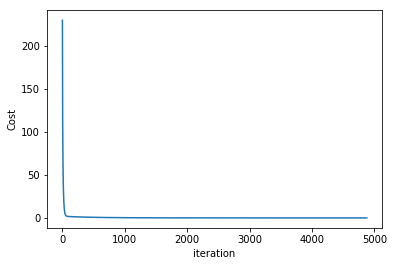

In [7]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [8]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

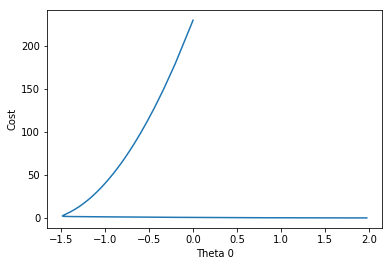

In [9]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

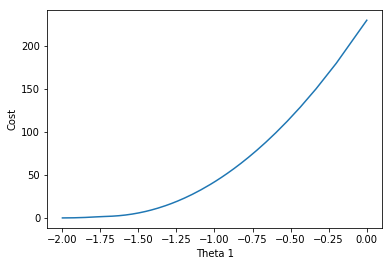

In [10]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

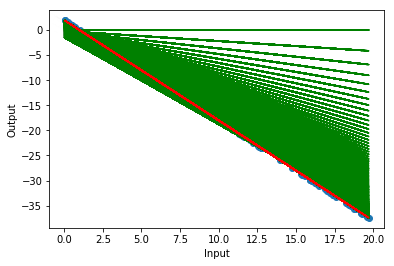

In [11]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

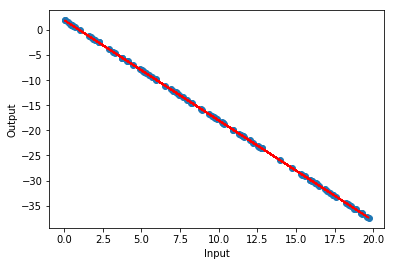

In [12]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

<h3> I changed Learning Rate from 0.2 to 0.1 </h3>

In [13]:
t,ts,l,it,hy,a = adagard(X,Y,.1,0.0001,.0001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 203.935089
Iteration 2 | The Cost is 187.183514
Iteration 3 | The Cost is 174.295932
Iteration 4 | The Cost is 163.676083
Iteration 5 | The Cost is 154.586381
Iteration 6 | The Cost is 146.615624
Iteration 7 | The Cost is 139.507263
Iteration 8 | The Cost is 133.088680
Iteration 9 | The Cost is 127.237234
Iteration 10 | The Cost is 121.862144
Iteration 11 | The Cost is 116.894007
Iteration 12 | The Cost is 112.278375
Iteration 13 | The Cost is 107.971614
Iteration 14 | The Cost is 103.938126
Iteration 15 | The Cost is 100.148427
Iteration 16 | The Cost is 96.577775
Iteration 17 | The Cost is 93.205173
Iteration 18 | The Cost is 90.012625
Iteration 19 | The Cost is 86.984568
Iteration 20 | The Cost is 84.107440
Iteration 21 | The Cost is 81.369340
Iteration 22 | The Cost is 78.759756
Iteration 23 | The Cost is 76.269350
Iteration 24 | The Cost is 73.889788
Iteration 25 | The Cost is 71.613589
Iteration 26 | The Cost is 69.43

Iteration 923 | The Cost is 1.147548
Iteration 924 | The Cost is 1.146858
Iteration 925 | The Cost is 1.146169
Iteration 926 | The Cost is 1.145481
Iteration 927 | The Cost is 1.144793
Iteration 928 | The Cost is 1.144105
Iteration 929 | The Cost is 1.143418
Iteration 930 | The Cost is 1.142731
Iteration 931 | The Cost is 1.142044
Iteration 932 | The Cost is 1.141359
Iteration 933 | The Cost is 1.140673
Iteration 934 | The Cost is 1.139988
Iteration 935 | The Cost is 1.139303
Iteration 936 | The Cost is 1.138619
Iteration 937 | The Cost is 1.137935
Iteration 938 | The Cost is 1.137252
Iteration 939 | The Cost is 1.136569
Iteration 940 | The Cost is 1.135887
Iteration 941 | The Cost is 1.135205
Iteration 942 | The Cost is 1.134523
Iteration 943 | The Cost is 1.133842
Iteration 944 | The Cost is 1.133161
Iteration 945 | The Cost is 1.132481
Iteration 946 | The Cost is 1.131801
Iteration 947 | The Cost is 1.131122
Iteration 948 | The Cost is 1.130443
Iteration 949 | The Cost is 1.129764
I

Iteration 1906 | The Cost is 0.640838
Iteration 1907 | The Cost is 0.640463
Iteration 1908 | The Cost is 0.640088
Iteration 1909 | The Cost is 0.639713
Iteration 1910 | The Cost is 0.639338
Iteration 1911 | The Cost is 0.638964
Iteration 1912 | The Cost is 0.638589
Iteration 1913 | The Cost is 0.638215
Iteration 1914 | The Cost is 0.637841
Iteration 1915 | The Cost is 0.637468
Iteration 1916 | The Cost is 0.637094
Iteration 1917 | The Cost is 0.636721
Iteration 1918 | The Cost is 0.636348
Iteration 1919 | The Cost is 0.635976
Iteration 1920 | The Cost is 0.635603
Iteration 1921 | The Cost is 0.635231
Iteration 1922 | The Cost is 0.634859
Iteration 1923 | The Cost is 0.634487
Iteration 1924 | The Cost is 0.634115
Iteration 1925 | The Cost is 0.633744
Iteration 1926 | The Cost is 0.633373
Iteration 1927 | The Cost is 0.633002
Iteration 1928 | The Cost is 0.632631
Iteration 1929 | The Cost is 0.632261
Iteration 1930 | The Cost is 0.631891
Iteration 1931 | The Cost is 0.631521
Iteration 19

Iteration 2784 | The Cost is 0.384430
Iteration 2785 | The Cost is 0.384208
Iteration 2786 | The Cost is 0.383986
Iteration 2787 | The Cost is 0.383764
Iteration 2788 | The Cost is 0.383542
Iteration 2789 | The Cost is 0.383320
Iteration 2790 | The Cost is 0.383098
Iteration 2791 | The Cost is 0.382876
Iteration 2792 | The Cost is 0.382655
Iteration 2793 | The Cost is 0.382434
Iteration 2794 | The Cost is 0.382212
Iteration 2795 | The Cost is 0.381991
Iteration 2796 | The Cost is 0.381770
Iteration 2797 | The Cost is 0.381549
Iteration 2798 | The Cost is 0.381329
Iteration 2799 | The Cost is 0.381108
Iteration 2800 | The Cost is 0.380888
Iteration 2801 | The Cost is 0.380667
Iteration 2802 | The Cost is 0.380447
Iteration 2803 | The Cost is 0.380227
Iteration 2804 | The Cost is 0.380007
Iteration 2805 | The Cost is 0.379787
Iteration 2806 | The Cost is 0.379568
Iteration 2807 | The Cost is 0.379348
Iteration 2808 | The Cost is 0.379129
Iteration 2809 | The Cost is 0.378910
Iteration 28

Iteration 3765 | The Cost is 0.218450
Iteration 3766 | The Cost is 0.218325
Iteration 3767 | The Cost is 0.218199
Iteration 3768 | The Cost is 0.218074
Iteration 3769 | The Cost is 0.217949
Iteration 3770 | The Cost is 0.217824
Iteration 3771 | The Cost is 0.217699
Iteration 3772 | The Cost is 0.217574
Iteration 3773 | The Cost is 0.217449
Iteration 3774 | The Cost is 0.217324
Iteration 3775 | The Cost is 0.217200
Iteration 3776 | The Cost is 0.217075
Iteration 3777 | The Cost is 0.216951
Iteration 3778 | The Cost is 0.216826
Iteration 3779 | The Cost is 0.216702
Iteration 3780 | The Cost is 0.216577
Iteration 3781 | The Cost is 0.216453
Iteration 3782 | The Cost is 0.216329
Iteration 3783 | The Cost is 0.216205
Iteration 3784 | The Cost is 0.216081
Iteration 3785 | The Cost is 0.215957
Iteration 3786 | The Cost is 0.215833
Iteration 3787 | The Cost is 0.215709
Iteration 3788 | The Cost is 0.215585
Iteration 3789 | The Cost is 0.215461
Iteration 3790 | The Cost is 0.215338
Iteration 37

Iteration 4735 | The Cost is 0.125347
Iteration 4736 | The Cost is 0.125275
Iteration 4737 | The Cost is 0.125204
Iteration 4738 | The Cost is 0.125132
Iteration 4739 | The Cost is 0.125061
Iteration 4740 | The Cost is 0.124989
Iteration 4741 | The Cost is 0.124918
Iteration 4742 | The Cost is 0.124847
Iteration 4743 | The Cost is 0.124775
Iteration 4744 | The Cost is 0.124704
Iteration 4745 | The Cost is 0.124633
Iteration 4746 | The Cost is 0.124562
Iteration 4747 | The Cost is 0.124490
Iteration 4748 | The Cost is 0.124419
Iteration 4749 | The Cost is 0.124348
Iteration 4750 | The Cost is 0.124277
Iteration 4751 | The Cost is 0.124206
Iteration 4752 | The Cost is 0.124135
Iteration 4753 | The Cost is 0.124064
Iteration 4754 | The Cost is 0.123993
Iteration 4755 | The Cost is 0.123923
Iteration 4756 | The Cost is 0.123852
Iteration 4757 | The Cost is 0.123781
Iteration 4758 | The Cost is 0.123710
Iteration 4759 | The Cost is 0.123640
Iteration 4760 | The Cost is 0.123569
Iteration 47

In [14]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9984264413648959


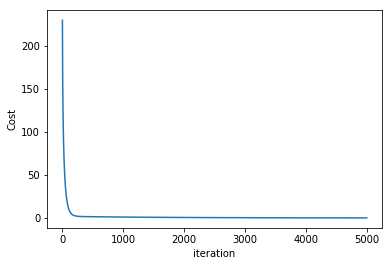

In [15]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

<h3> I changed epsilon to smaller value </h3>

In [16]:
t,ts,l,it,hy,a = adagard(X,Y,.1,0.00001,.0001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 203.935072
Iteration 2 | The Cost is 187.183490
Iteration 3 | The Cost is 174.295905
Iteration 4 | The Cost is 163.676052
Iteration 5 | The Cost is 154.586349
Iteration 6 | The Cost is 146.615591
Iteration 7 | The Cost is 139.507229
Iteration 8 | The Cost is 133.088645
Iteration 9 | The Cost is 127.237200
Iteration 10 | The Cost is 121.862109
Iteration 11 | The Cost is 116.893972
Iteration 12 | The Cost is 112.278340
Iteration 13 | The Cost is 107.971579
Iteration 14 | The Cost is 103.938091
Iteration 15 | The Cost is 100.148392
Iteration 16 | The Cost is 96.577740
Iteration 17 | The Cost is 93.205139
Iteration 18 | The Cost is 90.012591
Iteration 19 | The Cost is 86.984534
Iteration 20 | The Cost is 84.107407
Iteration 21 | The Cost is 81.369307
Iteration 22 | The Cost is 78.759722
Iteration 23 | The Cost is 76.269318
Iteration 24 | The Cost is 73.889755
Iteration 25 | The Cost is 71.613557
Iteration 26 | The Cost is 69.43

Iteration 684 | The Cost is 1.325648
Iteration 685 | The Cost is 1.324844
Iteration 686 | The Cost is 1.324041
Iteration 687 | The Cost is 1.323238
Iteration 688 | The Cost is 1.322435
Iteration 689 | The Cost is 1.321634
Iteration 690 | The Cost is 1.320832
Iteration 691 | The Cost is 1.320032
Iteration 692 | The Cost is 1.319232
Iteration 693 | The Cost is 1.318432
Iteration 694 | The Cost is 1.317633
Iteration 695 | The Cost is 1.316834
Iteration 696 | The Cost is 1.316036
Iteration 697 | The Cost is 1.315238
Iteration 698 | The Cost is 1.314441
Iteration 699 | The Cost is 1.313645
Iteration 700 | The Cost is 1.312849
Iteration 701 | The Cost is 1.312053
Iteration 702 | The Cost is 1.311258
Iteration 703 | The Cost is 1.310464
Iteration 704 | The Cost is 1.309670
Iteration 705 | The Cost is 1.308876
Iteration 706 | The Cost is 1.308083
Iteration 707 | The Cost is 1.307291
Iteration 708 | The Cost is 1.306499
Iteration 709 | The Cost is 1.305708
Iteration 710 | The Cost is 1.304917
I

Iteration 1419 | The Cost is 0.853712
Iteration 1420 | The Cost is 0.853207
Iteration 1421 | The Cost is 0.852702
Iteration 1422 | The Cost is 0.852197
Iteration 1423 | The Cost is 0.851692
Iteration 1424 | The Cost is 0.851188
Iteration 1425 | The Cost is 0.850684
Iteration 1426 | The Cost is 0.850181
Iteration 1427 | The Cost is 0.849677
Iteration 1428 | The Cost is 0.849175
Iteration 1429 | The Cost is 0.848672
Iteration 1430 | The Cost is 0.848170
Iteration 1431 | The Cost is 0.847668
Iteration 1432 | The Cost is 0.847166
Iteration 1433 | The Cost is 0.846665
Iteration 1434 | The Cost is 0.846163
Iteration 1435 | The Cost is 0.845663
Iteration 1436 | The Cost is 0.845162
Iteration 1437 | The Cost is 0.844662
Iteration 1438 | The Cost is 0.844162
Iteration 1439 | The Cost is 0.843663
Iteration 1440 | The Cost is 0.843163
Iteration 1441 | The Cost is 0.842665
Iteration 1442 | The Cost is 0.842166
Iteration 1443 | The Cost is 0.841668
Iteration 1444 | The Cost is 0.841170
Iteration 14

Iteration 2214 | The Cost is 0.535269
Iteration 2215 | The Cost is 0.534957
Iteration 2216 | The Cost is 0.534645
Iteration 2217 | The Cost is 0.534333
Iteration 2218 | The Cost is 0.534022
Iteration 2219 | The Cost is 0.533711
Iteration 2220 | The Cost is 0.533400
Iteration 2221 | The Cost is 0.533089
Iteration 2222 | The Cost is 0.532778
Iteration 2223 | The Cost is 0.532468
Iteration 2224 | The Cost is 0.532157
Iteration 2225 | The Cost is 0.531847
Iteration 2226 | The Cost is 0.531537
Iteration 2227 | The Cost is 0.531228
Iteration 2228 | The Cost is 0.530918
Iteration 2229 | The Cost is 0.530609
Iteration 2230 | The Cost is 0.530300
Iteration 2231 | The Cost is 0.529991
Iteration 2232 | The Cost is 0.529682
Iteration 2233 | The Cost is 0.529373
Iteration 2234 | The Cost is 0.529065
Iteration 2235 | The Cost is 0.528757
Iteration 2236 | The Cost is 0.528448
Iteration 2237 | The Cost is 0.528141
Iteration 2238 | The Cost is 0.527833
Iteration 2239 | The Cost is 0.527525
Iteration 22

Iteration 2962 | The Cost is 0.346835
Iteration 2963 | The Cost is 0.346635
Iteration 2964 | The Cost is 0.346435
Iteration 2965 | The Cost is 0.346235
Iteration 2966 | The Cost is 0.346035
Iteration 2967 | The Cost is 0.345835
Iteration 2968 | The Cost is 0.345635
Iteration 2969 | The Cost is 0.345436
Iteration 2970 | The Cost is 0.345236
Iteration 2971 | The Cost is 0.345037
Iteration 2972 | The Cost is 0.344838
Iteration 2973 | The Cost is 0.344638
Iteration 2974 | The Cost is 0.344439
Iteration 2975 | The Cost is 0.344241
Iteration 2976 | The Cost is 0.344042
Iteration 2977 | The Cost is 0.343843
Iteration 2978 | The Cost is 0.343645
Iteration 2979 | The Cost is 0.343446
Iteration 2980 | The Cost is 0.343248
Iteration 2981 | The Cost is 0.343050
Iteration 2982 | The Cost is 0.342852
Iteration 2983 | The Cost is 0.342654
Iteration 2984 | The Cost is 0.342456
Iteration 2985 | The Cost is 0.342258
Iteration 2986 | The Cost is 0.342061
Iteration 2987 | The Cost is 0.341863
Iteration 29

Iteration 3721 | The Cost is 0.224039
Iteration 3722 | The Cost is 0.223910
Iteration 3723 | The Cost is 0.223781
Iteration 3724 | The Cost is 0.223653
Iteration 3725 | The Cost is 0.223525
Iteration 3726 | The Cost is 0.223396
Iteration 3727 | The Cost is 0.223268
Iteration 3728 | The Cost is 0.223140
Iteration 3729 | The Cost is 0.223012
Iteration 3730 | The Cost is 0.222884
Iteration 3731 | The Cost is 0.222756
Iteration 3732 | The Cost is 0.222628
Iteration 3733 | The Cost is 0.222500
Iteration 3734 | The Cost is 0.222373
Iteration 3735 | The Cost is 0.222245
Iteration 3736 | The Cost is 0.222117
Iteration 3737 | The Cost is 0.221990
Iteration 3738 | The Cost is 0.221862
Iteration 3739 | The Cost is 0.221735
Iteration 3740 | The Cost is 0.221608
Iteration 3741 | The Cost is 0.221481
Iteration 3742 | The Cost is 0.221353
Iteration 3743 | The Cost is 0.221226
Iteration 3744 | The Cost is 0.221099
Iteration 3745 | The Cost is 0.220973
Iteration 3746 | The Cost is 0.220846
Iteration 37

Iteration 4315 | The Cost is 0.159381
Iteration 4316 | The Cost is 0.159290
Iteration 4317 | The Cost is 0.159199
Iteration 4318 | The Cost is 0.159108
Iteration 4319 | The Cost is 0.159016
Iteration 4320 | The Cost is 0.158925
Iteration 4321 | The Cost is 0.158835
Iteration 4322 | The Cost is 0.158744
Iteration 4323 | The Cost is 0.158653
Iteration 4324 | The Cost is 0.158562
Iteration 4325 | The Cost is 0.158471
Iteration 4326 | The Cost is 0.158381
Iteration 4327 | The Cost is 0.158290
Iteration 4328 | The Cost is 0.158199
Iteration 4329 | The Cost is 0.158109
Iteration 4330 | The Cost is 0.158018
Iteration 4331 | The Cost is 0.157928
Iteration 4332 | The Cost is 0.157838
Iteration 4333 | The Cost is 0.157747
Iteration 4334 | The Cost is 0.157657
Iteration 4335 | The Cost is 0.157567
Iteration 4336 | The Cost is 0.157477
Iteration 4337 | The Cost is 0.157387
Iteration 4338 | The Cost is 0.157296
Iteration 4339 | The Cost is 0.157206
Iteration 4340 | The Cost is 0.157117
Iteration 43

In [17]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.998426444842984


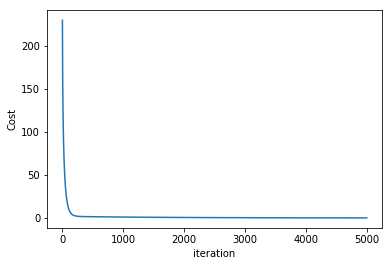

In [18]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

<h4> Make Learning Rate bigger </h4>

In [19]:
t,ts,l,it,hy,a = adagard(X,Y,.3,0.00001,.0001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 157.095876
Iteration 2 | The Cost is 118.126448
Iteration 3 | The Cost is 92.335030
Iteration 4 | The Cost is 73.776838
Iteration 5 | The Cost is 59.805857
Iteration 6 | The Cost is 48.987990
Iteration 7 | The Cost is 40.450666
Iteration 8 | The Cost is 33.620997
Iteration 9 | The Cost is 28.102165
Iteration 10 | The Cost is 23.608266
Iteration 11 | The Cost is 19.927067
Iteration 12 | The Cost is 16.897328
Iteration 13 | The Cost is 14.394291
Iteration 14 | The Cost is 12.320006
Iteration 15 | The Cost is 10.596663
Iteration 16 | The Cost is 9.161854
Iteration 17 | The Cost is 7.965133
Iteration 18 | The Cost is 6.965459
Iteration 19 | The Cost is 6.129266
Iteration 20 | The Cost is 5.428983
Iteration 21 | The Cost is 4.841878
Iteration 22 | The Cost is 4.349152
Iteration 23 | The Cost is 3.935222
Iteration 24 | The Cost is 3.587141
Iteration 25 | The Cost is 3.294136
Iteration 26 | The Cost is 3.047225
Iteration 27 | The 

Iteration 842 | The Cost is 0.060531
Iteration 843 | The Cost is 0.060285
Iteration 844 | The Cost is 0.060039
Iteration 845 | The Cost is 0.059794
Iteration 846 | The Cost is 0.059550
Iteration 847 | The Cost is 0.059307
Iteration 848 | The Cost is 0.059066
Iteration 849 | The Cost is 0.058825
Iteration 850 | The Cost is 0.058585
Iteration 851 | The Cost is 0.058346
Iteration 852 | The Cost is 0.058108
Iteration 853 | The Cost is 0.057871
Iteration 854 | The Cost is 0.057635
Iteration 855 | The Cost is 0.057400
Iteration 856 | The Cost is 0.057166
Iteration 857 | The Cost is 0.056933
Iteration 858 | The Cost is 0.056701
Iteration 859 | The Cost is 0.056470
Iteration 860 | The Cost is 0.056240
Iteration 861 | The Cost is 0.056011
Iteration 862 | The Cost is 0.055782
Iteration 863 | The Cost is 0.055555
Iteration 864 | The Cost is 0.055328
Iteration 865 | The Cost is 0.055103
Iteration 866 | The Cost is 0.054878
Iteration 867 | The Cost is 0.054654
Iteration 868 | The Cost is 0.054432
I

Iteration 1770 | The Cost is 0.001375
Iteration 1771 | The Cost is 0.001369
Iteration 1772 | The Cost is 0.001363
Iteration 1773 | The Cost is 0.001358
Iteration 1774 | The Cost is 0.001352
Iteration 1775 | The Cost is 0.001347
Iteration 1776 | The Cost is 0.001341
Iteration 1777 | The Cost is 0.001336
Iteration 1778 | The Cost is 0.001330
Iteration 1779 | The Cost is 0.001325
Iteration 1780 | The Cost is 0.001320
Iteration 1781 | The Cost is 0.001314
Iteration 1782 | The Cost is 0.001309
Iteration 1783 | The Cost is 0.001304
Iteration 1784 | The Cost is 0.001298
Iteration 1785 | The Cost is 0.001293
Iteration 1786 | The Cost is 0.001288
Iteration 1787 | The Cost is 0.001283
Iteration 1788 | The Cost is 0.001277
Iteration 1789 | The Cost is 0.001272
Iteration 1790 | The Cost is 0.001267
Iteration 1791 | The Cost is 0.001262
Iteration 1792 | The Cost is 0.001257
Iteration 1793 | The Cost is 0.001252
Iteration 1794 | The Cost is 0.001246
Iteration 1795 | The Cost is 0.001241
Iteration 17

In [20]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999986390243082


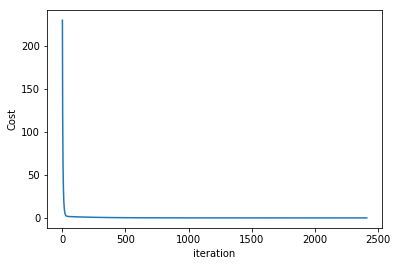

In [21]:
plt.plot(it,l)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [22]:
thetas = np.array(ts)
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

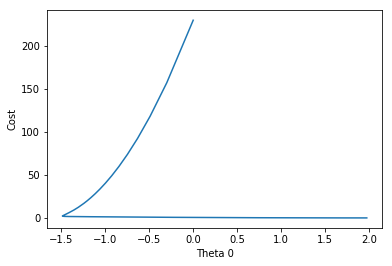

In [23]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

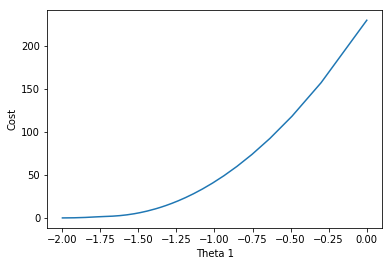

In [24]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

## RMSProp

### Update the previos implementation to be RMSProp.
#### Compare your results with Adagrad results.

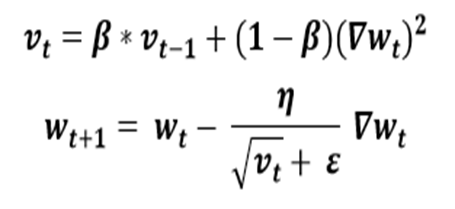

In [25]:
def RMSProp(x,y,alpha,beta,epsilon,tolerance,max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    vn = 0
    XT = x.T
    for i in range(max_iter):
        theta_copy = theta.copy()
        hx = np.dot(x,theta)
        errors = np.subtract(hx,y)
        j = np.sum(errors**2)/(2*m)
        
        print("Iteration %d | The Cost is %f" %(i,j))
        gradients = (np.dot(XT,errors))/m
        vn = beta*vn + (1-beta)*np.power(gradients,2)
        theta = theta - ((gradients*alpha)/(np.sqrt(vn)+epsilon))
        if ( theta == theta_copy ).all() or j < tolerance :
            print("Stopped at Iteration %d | The Cost is %f" %(i,j))
            return theta,np.array(thetas),cost,iteration,np.array(hxs),alpha
        hxs.append(hx)
        thetas.append(theta)
        cost.append(j)
        iteration.append(i)
    return theta,np.array(thetas),cost,iteration,np.array(hxs),alpha
t,ts,l,it,hy,a = RMSProp(X,Y,.001,.9,.00001,.00001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 228.830362
Iteration 2 | The Cost is 228.224380
Iteration 3 | The Cost is 227.717866
Iteration 4 | The Cost is 227.268882
Iteration 5 | The Cost is 226.857957
Iteration 6 | The Cost is 226.474239
Iteration 7 | The Cost is 226.110978
Iteration 8 | The Cost is 225.763654
Iteration 9 | The Cost is 225.429074
Iteration 10 | The Cost is 225.104892
Iteration 11 | The Cost is 224.789330
Iteration 12 | The Cost is 224.481005
Iteration 13 | The Cost is 224.178823
Iteration 14 | The Cost is 223.881900
Iteration 15 | The Cost is 223.589512
Iteration 16 | The Cost is 223.301062
Iteration 17 | The Cost is 223.016050
Iteration 18 | The Cost is 222.734056
Iteration 19 | The Cost is 222.454721
Iteration 20 | The Cost is 222.177739
Iteration 21 | The Cost is 221.902846
Iteration 22 | The Cost is 221.629816
Iteration 23 | The Cost is 221.358451
Iteration 24 | The Cost is 221.088579
Iteration 25 | The Cost is 220.820049
Iteration 26 | The Cos

Iteration 669 | The Cost is 86.095806
Iteration 670 | The Cost is 85.936113
Iteration 671 | The Cost is 85.776572
Iteration 672 | The Cost is 85.617184
Iteration 673 | The Cost is 85.457950
Iteration 674 | The Cost is 85.298868
Iteration 675 | The Cost is 85.139939
Iteration 676 | The Cost is 84.981162
Iteration 677 | The Cost is 84.822539
Iteration 678 | The Cost is 84.664069
Iteration 679 | The Cost is 84.505751
Iteration 680 | The Cost is 84.347586
Iteration 681 | The Cost is 84.189574
Iteration 682 | The Cost is 84.031715
Iteration 683 | The Cost is 83.874009
Iteration 684 | The Cost is 83.716456
Iteration 685 | The Cost is 83.559056
Iteration 686 | The Cost is 83.401808
Iteration 687 | The Cost is 83.244713
Iteration 688 | The Cost is 83.087771
Iteration 689 | The Cost is 82.930982
Iteration 690 | The Cost is 82.774346
Iteration 691 | The Cost is 82.617863
Iteration 692 | The Cost is 82.461532
Iteration 693 | The Cost is 82.305355
Iteration 694 | The Cost is 82.149330
Iteration 69

Iteration 1404 | The Cost is 9.822147
Iteration 1405 | The Cost is 9.774122
Iteration 1406 | The Cost is 9.726247
Iteration 1407 | The Cost is 9.678521
Iteration 1408 | The Cost is 9.630945
Iteration 1409 | The Cost is 9.583519
Iteration 1410 | The Cost is 9.536243
Iteration 1411 | The Cost is 9.489117
Iteration 1412 | The Cost is 9.442140
Iteration 1413 | The Cost is 9.395313
Iteration 1414 | The Cost is 9.348636
Iteration 1415 | The Cost is 9.302108
Iteration 1416 | The Cost is 9.255731
Iteration 1417 | The Cost is 9.209503
Iteration 1418 | The Cost is 9.163424
Iteration 1419 | The Cost is 9.117495
Iteration 1420 | The Cost is 9.071716
Iteration 1421 | The Cost is 9.026087
Iteration 1422 | The Cost is 8.980607
Iteration 1423 | The Cost is 8.935277
Iteration 1424 | The Cost is 8.890096
Iteration 1425 | The Cost is 8.845065
Iteration 1426 | The Cost is 8.800183
Iteration 1427 | The Cost is 8.755451
Iteration 1428 | The Cost is 8.710869
Iteration 1429 | The Cost is 8.666436
Iteration 14

Iteration 2127 | The Cost is 1.335984
Iteration 2128 | The Cost is 1.335130
Iteration 2129 | The Cost is 1.334277
Iteration 2130 | The Cost is 1.333423
Iteration 2131 | The Cost is 1.332571
Iteration 2132 | The Cost is 1.331718
Iteration 2133 | The Cost is 1.330866
Iteration 2134 | The Cost is 1.330013
Iteration 2135 | The Cost is 1.329162
Iteration 2136 | The Cost is 1.328310
Iteration 2137 | The Cost is 1.327459
Iteration 2138 | The Cost is 1.326607
Iteration 2139 | The Cost is 1.325757
Iteration 2140 | The Cost is 1.324906
Iteration 2141 | The Cost is 1.324056
Iteration 2142 | The Cost is 1.323206
Iteration 2143 | The Cost is 1.322357
Iteration 2144 | The Cost is 1.321507
Iteration 2145 | The Cost is 1.320658
Iteration 2146 | The Cost is 1.319809
Iteration 2147 | The Cost is 1.318961
Iteration 2148 | The Cost is 1.318112
Iteration 2149 | The Cost is 1.317264
Iteration 2150 | The Cost is 1.316416
Iteration 2151 | The Cost is 1.315569
Iteration 2152 | The Cost is 1.314722
Iteration 21

Iteration 2875 | The Cost is 0.773805
Iteration 2876 | The Cost is 0.773155
Iteration 2877 | The Cost is 0.772507
Iteration 2878 | The Cost is 0.771858
Iteration 2879 | The Cost is 0.771210
Iteration 2880 | The Cost is 0.770561
Iteration 2881 | The Cost is 0.769914
Iteration 2882 | The Cost is 0.769266
Iteration 2883 | The Cost is 0.768619
Iteration 2884 | The Cost is 0.767972
Iteration 2885 | The Cost is 0.767326
Iteration 2886 | The Cost is 0.766679
Iteration 2887 | The Cost is 0.766033
Iteration 2888 | The Cost is 0.765387
Iteration 2889 | The Cost is 0.764742
Iteration 2890 | The Cost is 0.764096
Iteration 2891 | The Cost is 0.763452
Iteration 2892 | The Cost is 0.762806
Iteration 2893 | The Cost is 0.762162
Iteration 2894 | The Cost is 0.761518
Iteration 2895 | The Cost is 0.760874
Iteration 2896 | The Cost is 0.760230
Iteration 2897 | The Cost is 0.759587
Iteration 2898 | The Cost is 0.758943
Iteration 2899 | The Cost is 0.758301
Iteration 2900 | The Cost is 0.757658
Iteration 29

Iteration 3663 | The Cost is 0.347031
Iteration 3664 | The Cost is 0.346597
Iteration 3665 | The Cost is 0.346164
Iteration 3666 | The Cost is 0.345730
Iteration 3667 | The Cost is 0.345298
Iteration 3668 | The Cost is 0.344864
Iteration 3669 | The Cost is 0.344432
Iteration 3670 | The Cost is 0.344000
Iteration 3671 | The Cost is 0.343568
Iteration 3672 | The Cost is 0.343136
Iteration 3673 | The Cost is 0.342705
Iteration 3674 | The Cost is 0.342274
Iteration 3675 | The Cost is 0.341843
Iteration 3676 | The Cost is 0.341412
Iteration 3677 | The Cost is 0.340982
Iteration 3678 | The Cost is 0.340552
Iteration 3679 | The Cost is 0.340123
Iteration 3680 | The Cost is 0.339693
Iteration 3681 | The Cost is 0.339264
Iteration 3682 | The Cost is 0.338834
Iteration 3683 | The Cost is 0.338406
Iteration 3684 | The Cost is 0.337977
Iteration 3685 | The Cost is 0.337550
Iteration 3686 | The Cost is 0.337122
Iteration 3687 | The Cost is 0.336694
Iteration 3688 | The Cost is 0.336267
Iteration 36

Iteration 4405 | The Cost is 0.100066
Iteration 4406 | The Cost is 0.099834
Iteration 4407 | The Cost is 0.099603
Iteration 4408 | The Cost is 0.099371
Iteration 4409 | The Cost is 0.099141
Iteration 4410 | The Cost is 0.098909
Iteration 4411 | The Cost is 0.098680
Iteration 4412 | The Cost is 0.098449
Iteration 4413 | The Cost is 0.098220
Iteration 4414 | The Cost is 0.097990
Iteration 4415 | The Cost is 0.097761
Iteration 4416 | The Cost is 0.097531
Iteration 4417 | The Cost is 0.097303
Iteration 4418 | The Cost is 0.097074
Iteration 4419 | The Cost is 0.096846
Iteration 4420 | The Cost is 0.096618
Iteration 4421 | The Cost is 0.096391
Iteration 4422 | The Cost is 0.096163
Iteration 4423 | The Cost is 0.095936
Iteration 4424 | The Cost is 0.095709
Iteration 4425 | The Cost is 0.095483
Iteration 4426 | The Cost is 0.095256
Iteration 4427 | The Cost is 0.095031
Iteration 4428 | The Cost is 0.094804
Iteration 4429 | The Cost is 0.094579
Iteration 4430 | The Cost is 0.094354
Iteration 44

In [26]:
print("Feature         : ",X[7])
print("True Value      : ",Y[7])
print("Predicted Value : ",np.dot(X[7],t))

Feature         :  [ 1.         10.36835976]
True Value      :  [-18.73671951]
Predicted Value :  [-18.80506939]


In [27]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9998610099893079


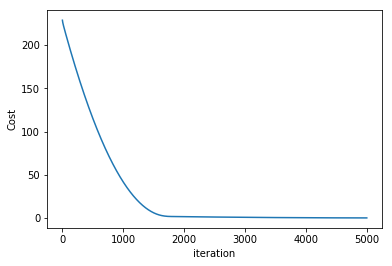

In [28]:
plt.plot(l[1:])
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [29]:
thetas = np.array(ts).reshape(-1,X.shape[1])
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

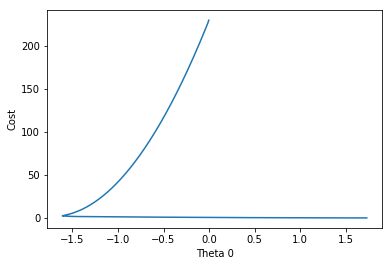

In [30]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

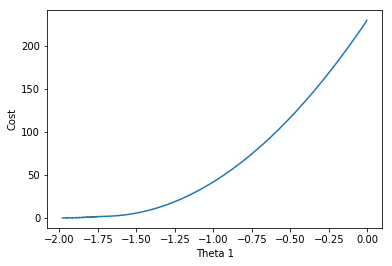

In [31]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

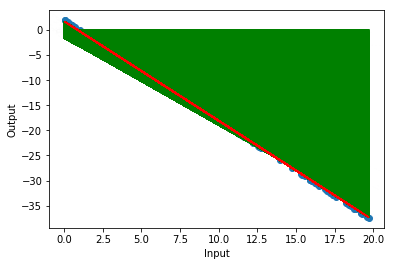

In [32]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

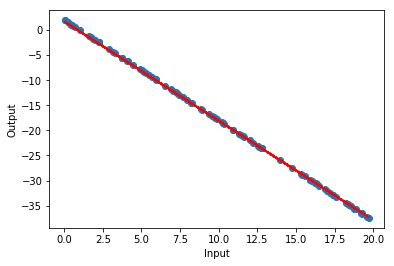

In [33]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

<h4> Changin Beta </h4>

In [34]:
t,ts,l,it,hy,a = RMSProp(X,Y,.001,.3,.00001,.00001,5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 229.351041
Iteration 2 | The Cost is 229.073529
Iteration 3 | The Cost is 228.805329
Iteration 4 | The Cost is 228.539857
Iteration 5 | The Cost is 228.275298
Iteration 6 | The Cost is 228.011120
Iteration 7 | The Cost is 227.747163
Iteration 8 | The Cost is 227.483381
Iteration 9 | The Cost is 227.219759
Iteration 10 | The Cost is 226.956293
Iteration 11 | The Cost is 226.692981
Iteration 12 | The Cost is 226.429824
Iteration 13 | The Cost is 226.166821
Iteration 14 | The Cost is 225.903973
Iteration 15 | The Cost is 225.641278
Iteration 16 | The Cost is 225.378738
Iteration 17 | The Cost is 225.116352
Iteration 18 | The Cost is 224.854120
Iteration 19 | The Cost is 224.592042
Iteration 20 | The Cost is 224.330119
Iteration 21 | The Cost is 224.068349
Iteration 22 | The Cost is 223.806734
Iteration 23 | The Cost is 223.545273
Iteration 24 | The Cost is 223.283966
Iteration 25 | The Cost is 223.022813
Iteration 26 | The Cos

Iteration 935 | The Cost is 49.271285
Iteration 936 | The Cost is 49.150560
Iteration 937 | The Cost is 49.029989
Iteration 938 | The Cost is 48.909572
Iteration 939 | The Cost is 48.789309
Iteration 940 | The Cost is 48.669200
Iteration 941 | The Cost is 48.549246
Iteration 942 | The Cost is 48.429445
Iteration 943 | The Cost is 48.309799
Iteration 944 | The Cost is 48.190307
Iteration 945 | The Cost is 48.070968
Iteration 946 | The Cost is 47.951784
Iteration 947 | The Cost is 47.832754
Iteration 948 | The Cost is 47.713879
Iteration 949 | The Cost is 47.595157
Iteration 950 | The Cost is 47.476589
Iteration 951 | The Cost is 47.358176
Iteration 952 | The Cost is 47.239917
Iteration 953 | The Cost is 47.121811
Iteration 954 | The Cost is 47.003860
Iteration 955 | The Cost is 46.886063
Iteration 956 | The Cost is 46.768421
Iteration 957 | The Cost is 46.650932
Iteration 958 | The Cost is 46.533597
Iteration 959 | The Cost is 46.416417
Iteration 960 | The Cost is 46.299390
Iteration 96

Iteration 1904 | The Cost is 1.546388
Iteration 1905 | The Cost is 1.545459
Iteration 1906 | The Cost is 1.544546
Iteration 1907 | The Cost is 1.543618
Iteration 1908 | The Cost is 1.542705
Iteration 1909 | The Cost is 1.541777
Iteration 1910 | The Cost is 1.540866
Iteration 1911 | The Cost is 1.539938
Iteration 1912 | The Cost is 1.539027
Iteration 1913 | The Cost is 1.538100
Iteration 1914 | The Cost is 1.537189
Iteration 1915 | The Cost is 1.536263
Iteration 1916 | The Cost is 1.535353
Iteration 1917 | The Cost is 1.534427
Iteration 1918 | The Cost is 1.533518
Iteration 1919 | The Cost is 1.532593
Iteration 1920 | The Cost is 1.531684
Iteration 1921 | The Cost is 1.530759
Iteration 1922 | The Cost is 1.529850
Iteration 1923 | The Cost is 1.528926
Iteration 1924 | The Cost is 1.528018
Iteration 1925 | The Cost is 1.527095
Iteration 1926 | The Cost is 1.526187
Iteration 1927 | The Cost is 1.525264
Iteration 1928 | The Cost is 1.524358
Iteration 1929 | The Cost is 1.523435
Iteration 19

Iteration 2804 | The Cost is 0.828436
Iteration 2805 | The Cost is 0.827754
Iteration 2806 | The Cost is 0.827088
Iteration 2807 | The Cost is 0.826406
Iteration 2808 | The Cost is 0.825741
Iteration 2809 | The Cost is 0.825060
Iteration 2810 | The Cost is 0.824395
Iteration 2811 | The Cost is 0.823715
Iteration 2812 | The Cost is 0.823051
Iteration 2813 | The Cost is 0.822371
Iteration 2814 | The Cost is 0.821707
Iteration 2815 | The Cost is 0.821028
Iteration 2816 | The Cost is 0.820365
Iteration 2817 | The Cost is 0.819686
Iteration 2818 | The Cost is 0.819023
Iteration 2819 | The Cost is 0.818345
Iteration 2820 | The Cost is 0.817683
Iteration 2821 | The Cost is 0.817005
Iteration 2822 | The Cost is 0.816344
Iteration 2823 | The Cost is 0.815667
Iteration 2824 | The Cost is 0.815006
Iteration 2825 | The Cost is 0.814329
Iteration 2826 | The Cost is 0.813669
Iteration 2827 | The Cost is 0.812993
Iteration 2828 | The Cost is 0.812333
Iteration 2829 | The Cost is 0.811658
Iteration 28

Iteration 3819 | The Cost is 0.285449
Iteration 3820 | The Cost is 0.285062
Iteration 3821 | The Cost is 0.284659
Iteration 3822 | The Cost is 0.284272
Iteration 3823 | The Cost is 0.283869
Iteration 3824 | The Cost is 0.283482
Iteration 3825 | The Cost is 0.283080
Iteration 3826 | The Cost is 0.282694
Iteration 3827 | The Cost is 0.282293
Iteration 3828 | The Cost is 0.281907
Iteration 3829 | The Cost is 0.281506
Iteration 3830 | The Cost is 0.281121
Iteration 3831 | The Cost is 0.280721
Iteration 3832 | The Cost is 0.280337
Iteration 3833 | The Cost is 0.279937
Iteration 3834 | The Cost is 0.279553
Iteration 3835 | The Cost is 0.279154
Iteration 3836 | The Cost is 0.278770
Iteration 3837 | The Cost is 0.278372
Iteration 3838 | The Cost is 0.277989
Iteration 3839 | The Cost is 0.277591
Iteration 3840 | The Cost is 0.277208
Iteration 3841 | The Cost is 0.276811
Iteration 3842 | The Cost is 0.276429
Iteration 3843 | The Cost is 0.276032
Iteration 3844 | The Cost is 0.275651
Iteration 38

Iteration 4756 | The Cost is 0.035142
Iteration 4757 | The Cost is 0.034996
Iteration 4758 | The Cost is 0.034866
Iteration 4759 | The Cost is 0.034720
Iteration 4760 | The Cost is 0.034590
Iteration 4761 | The Cost is 0.034445
Iteration 4762 | The Cost is 0.034316
Iteration 4763 | The Cost is 0.034171
Iteration 4764 | The Cost is 0.034042
Iteration 4765 | The Cost is 0.033898
Iteration 4766 | The Cost is 0.033770
Iteration 4767 | The Cost is 0.033626
Iteration 4768 | The Cost is 0.033499
Iteration 4769 | The Cost is 0.033356
Iteration 4770 | The Cost is 0.033229
Iteration 4771 | The Cost is 0.033086
Iteration 4772 | The Cost is 0.032960
Iteration 4773 | The Cost is 0.032818
Iteration 4774 | The Cost is 0.032692
Iteration 4775 | The Cost is 0.032550
Iteration 4776 | The Cost is 0.032425
Iteration 4777 | The Cost is 0.032284
Iteration 4778 | The Cost is 0.032159
Iteration 4779 | The Cost is 0.032019
Iteration 4780 | The Cost is 0.031894
Iteration 4781 | The Cost is 0.031755
Iteration 47

In [35]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9998680514565691


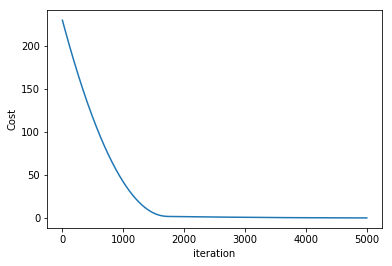

In [36]:
plt.plot(l[1:])
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [37]:
thetas = np.array(ts).reshape(-1,X.shape[1])
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

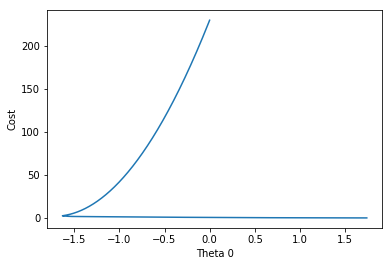

In [38]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

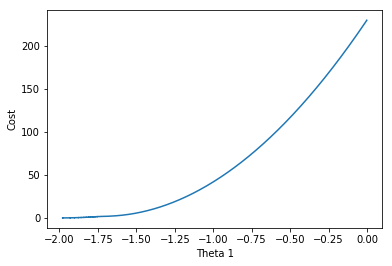

In [39]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

## Adam

### Update the previos implementation to be Adam.
#### Compare your results with Adagrad and RMSProp results.

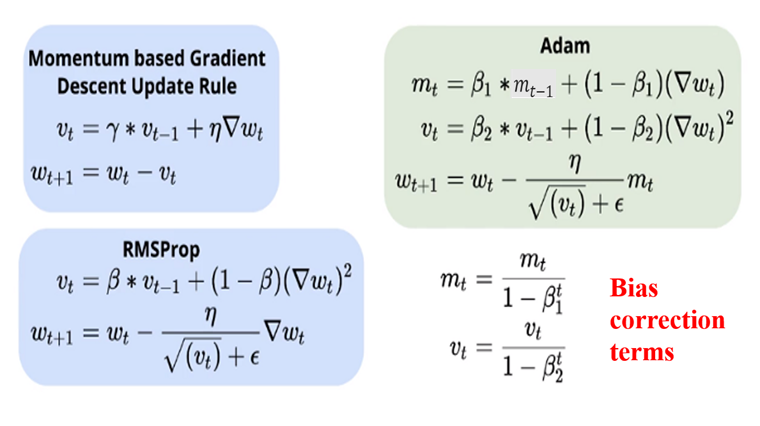

In [60]:
def adam(x, y, alpha, beta1, beta2, epsilon, tolerance, max_iter):
    cost = []
    iteration = []
    thetas = []
    hxs = []
    theta = np.zeros( ( X.shape[1], 1 ) )
    m = x.shape[0]
    XT = x.T
    vn = mn = 0
    for i in range(max_iter):
        theta_copy = theta.copy()
        hx = np.dot( x, theta )
        errors = np.subtract( hx, y )
        j = np.sum( errors**2 ) / ( 2 * m )
        print( "Iteration %d | The Cost is %f" %( i, j ) )
        hxs.append( hx )
        thetas.append( theta )
        cost.append( j )
        iteration.append( i )
        gradients = ( np.dot( XT, errors) ) / m
        mn = beta1 * mn + ( ( 1 - beta1 ) * gradients )
        vn = beta2 * vn + ( ( 1 - beta2 ) * np.power( gradients, 2 ) )
        mn = mn/(1-beta1**(i+1))
        vn = vn/(1-beta2**(i+1))
        theta = theta - ( ( mn * alpha ) / ( np.sqrt( vn ) + epsilon ) )
        if j <= tolerance or ( theta == theta_copy ).all():
            print( "Stop Iteration %d | The Cost is %f" %( i, j ) )
            return theta, np.array( thetas ), cost, iteration, np.array( hxs )
    return theta, np.array( thetas ), cost, iteration, np.array( hxs )
t,ts,l,it,hy = adam(X, Y , .1, 0.8, 0.88, 1**-8, .00001, 5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 204.117787
Iteration 2 | The Cost is 172.763998
Iteration 3 | The Cost is 142.591889
Iteration 4 | The Cost is 116.684653
Iteration 5 | The Cost is 95.763933
Iteration 6 | The Cost is 79.420858
Iteration 7 | The Cost is 66.859572
Iteration 8 | The Cost is 57.259593
Iteration 9 | The Cost is 49.915428
Iteration 10 | The Cost is 44.267917
Iteration 11 | The Cost is 39.891643
Iteration 12 | The Cost is 36.469420
Iteration 13 | The Cost is 33.766717
Iteration 14 | The Cost is 31.610321
Iteration 15 | The Cost is 29.871881
Iteration 16 | The Cost is 28.455710
Iteration 17 | The Cost is 27.289923
Iteration 18 | The Cost is 26.320045
Iteration 19 | The Cost is 25.504418
Iteration 20 | The Cost is 24.810886
Iteration 21 | The Cost is 24.214399
Iteration 22 | The Cost is 23.695260
Iteration 23 | The Cost is 23.237842
Iteration 24 | The Cost is 22.829639
Iteration 25 | The Cost is 22.460555
Iteration 26 | The Cost is 22.122369
Iterat

In [61]:
print("Feature         : ",X[7])
print("True Value      : ",Y[7])
print("Predicted Value : ",np.dot(X[7],t))

Feature         :  [ 1.         10.36835976]
True Value      :  [-18.73671951]
Predicted Value :  [-18.73861312]


In [62]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999998774576547


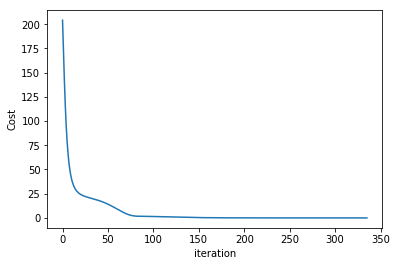

In [63]:
plt.plot(l[1:])
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [64]:
thetas = np.array(ts).reshape(-1,X.shape[1])
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

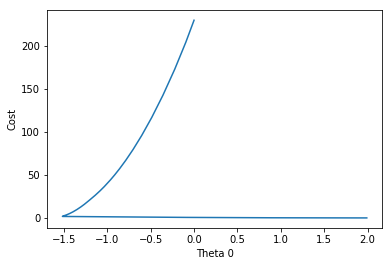

In [65]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

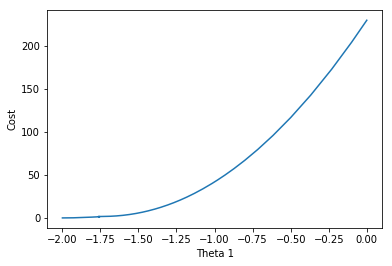

In [66]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

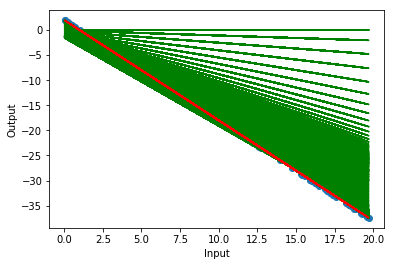

In [67]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

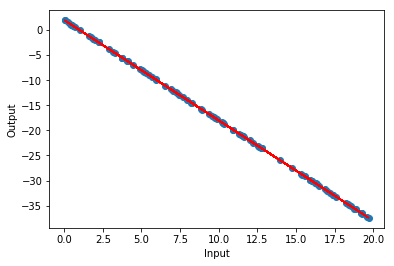

In [68]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

<h4> Changing Beta values </h4> 

In [74]:
t,ts,l,it,hy = adam(X, Y , .1, 0.4, 0.44, 1**-8, .00001, 5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 204.117787
Iteration 2 | The Cost is 178.540924
Iteration 3 | The Cost is 155.299988
Iteration 4 | The Cost is 134.284304
Iteration 5 | The Cost is 115.130683
Iteration 6 | The Cost is 97.611215
Iteration 7 | The Cost is 81.622911
Iteration 8 | The Cost is 67.128514
Iteration 9 | The Cost is 54.117191
Iteration 10 | The Cost is 42.585628
Iteration 11 | The Cost is 32.530352
Iteration 12 | The Cost is 23.944778
Iteration 13 | The Cost is 16.817583
Iteration 14 | The Cost is 11.130539
Iteration 15 | The Cost is 6.854089
Iteration 16 | The Cost is 3.937394
Iteration 17 | The Cost is 2.284025
Iteration 18 | The Cost is 1.689524
Iteration 19 | The Cost is 1.714625
Iteration 20 | The Cost is 1.721922
Iteration 21 | The Cost is 1.575724
Iteration 22 | The Cost is 1.545504
Iteration 23 | The Cost is 1.485397
Iteration 24 | The Cost is 1.450252
Iteration 25 | The Cost is 1.402204
Iteration 26 | The Cost is 1.358852
Iteration 27 | Th

In [75]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999937848849175


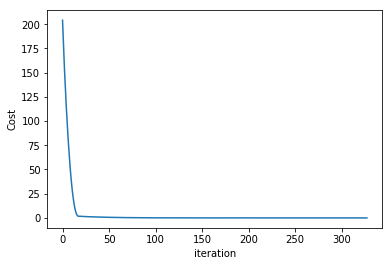

In [76]:
plt.plot(l[1:])
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [77]:
thetas = np.array(ts).reshape(-1,X.shape[1])
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

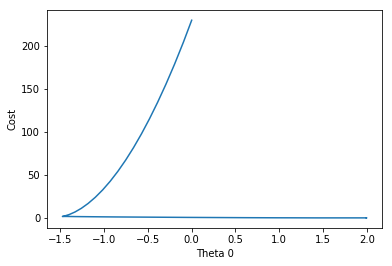

In [78]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

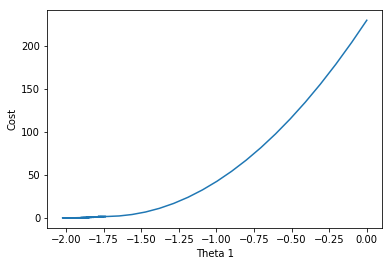

In [79]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

<h4> I changed the epsilon </h4>

In [80]:
t,ts,l,it,hy = adam(X, Y , .1, 0.3, 0.88, .5, .00001, 5000)

Iteration 0 | The Cost is 229.667710
Iteration 1 | The Cost is 204.027733
Iteration 2 | The Cost is 191.657161
Iteration 3 | The Cost is 184.978229
Iteration 4 | The Cost is 180.792130
Iteration 5 | The Cost is 177.853006
Iteration 6 | The Cost is 175.617027
Iteration 7 | The Cost is 173.814031
Iteration 8 | The Cost is 172.294392
Iteration 9 | The Cost is 170.967957
Iteration 10 | The Cost is 169.776757
Iteration 11 | The Cost is 168.681532
Iteration 12 | The Cost is 167.654510
Iteration 13 | The Cost is 166.675288
Iteration 14 | The Cost is 165.728354
Iteration 15 | The Cost is 164.801532
Iteration 16 | The Cost is 163.884977
Iteration 17 | The Cost is 162.970503
Iteration 18 | The Cost is 162.051118
Iteration 19 | The Cost is 161.120705
Iteration 20 | The Cost is 160.173788
Iteration 21 | The Cost is 159.205364
Iteration 22 | The Cost is 158.210781
Iteration 23 | The Cost is 157.185643
Iteration 24 | The Cost is 156.125745
Iteration 25 | The Cost is 155.027013
Iteration 26 | The Cos

Iteration 864 | The Cost is 0.000020
Iteration 865 | The Cost is 0.000569
Iteration 866 | The Cost is 0.000885
Iteration 867 | The Cost is 0.001014
Iteration 868 | The Cost is 0.001390
Iteration 869 | The Cost is 0.002508
Iteration 870 | The Cost is 0.005820
Iteration 871 | The Cost is 0.016447
Iteration 872 | The Cost is 0.050941
Iteration 873 | The Cost is 0.133346
Iteration 874 | The Cost is 0.183851
Iteration 875 | The Cost is 0.097732
Iteration 876 | The Cost is 0.018653
Iteration 877 | The Cost is 0.000602
Iteration 878 | The Cost is 0.000340
Iteration 879 | The Cost is 0.000832
Iteration 880 | The Cost is 0.000963
Iteration 881 | The Cost is 0.001218
Iteration 882 | The Cost is 0.002004
Iteration 883 | The Cost is 0.004298
Iteration 884 | The Cost is 0.011467
Iteration 885 | The Cost is 0.035071
Iteration 886 | The Cost is 0.101436
Iteration 887 | The Cost is 0.182480
Iteration 888 | The Cost is 0.134346
Iteration 889 | The Cost is 0.036533
Iteration 890 | The Cost is 0.002755
I

In [81]:
h = np.dot(X,t)
r = r2_score(h,Y)
print("R2 Score for Gradient is ", r)

R2 Score for Gradient is  0.9999919847777798


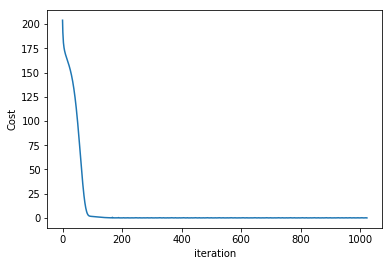

In [82]:
plt.plot(l[1:])
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()

In [83]:
thetas = np.array(ts).reshape(-1,X.shape[1])
theta_0 = thetas[:,0]
theta_1 = thetas[:,1]

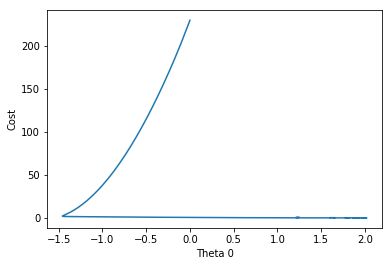

In [84]:
plt.plot(theta_0,l)
plt.xlabel("Theta 0")
plt.ylabel("Cost")
plt.show()

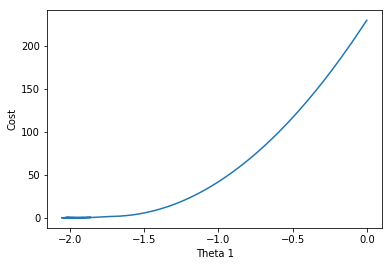

In [85]:
plt.plot(theta_1,l)
plt.xlabel("Theta 1")
plt.ylabel("Cost")
plt.show()

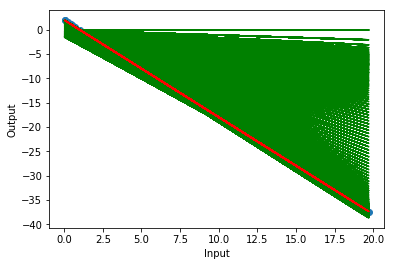

In [86]:
plt.scatter(X[:,1],Y)
for i in hy:
    plt.plot(X[:,1],i,'-',c='g')
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

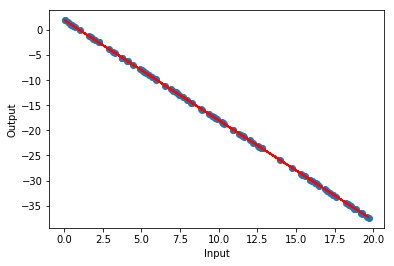

In [87]:
plt.scatter(X[:,1],Y)
plt.plot(X[:,1],h,'-',c='r')
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Congratulations 
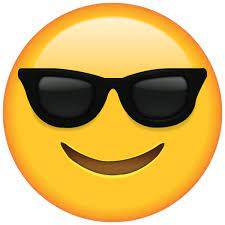